¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola! Realizaste un gran trabajo con el desarrollo del ejercicio, desde la carga de datos hasta el desarrollo de las prueba de hipótesis, cada vez estas más cercas de convertirte en una analista de datos. Solamente te dejo algunos comentarios para terminar de compleentar los análisis
</div>

# Proposito del Proyecto Juegos de Consolas

[Conocer que plataforma es la mas vendida asi como que genero es mas vendido y cual de esos generos es el que mas se vende y en que contineste se vende mas cada genero
]

## Inicialización

In [1]:
!pip install sidetable

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import sidetable as stb

## 1.2 Cargar datos

In [3]:
datos_crudos = pd.read_csv("games.csv")
#/datasets/


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## 1.3 Preparar los datos

In [4]:
def info_gral(datos):
    print("Primeras Filas")
    print(datos.head())
    print()
    print("Datos Generales")
    print(datos.info())
    print()
    print("Revision de Datos Ausentes")
    print(datos.isna().sum())
    print()
    print("Revision de Duplicados")
    print(datos.duplicated().sum())


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el uso de info()  para mostrar la información general de las bases con las que vamosa trabajar. Además realizaste el análisis de duplicados para asegurar que no tendremos resultados sesgados

</div>

In [5]:
info_gral(datos_crudos)

Primeras Filas
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 

In [6]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


[SE REVISO TODO EL ARCHIVO QUE SE NECESITARIA HACER DE LIMPIEZA SABER SI HABIA DATOS AUSENTES, DUPLICADOS Y EL FORMATO DE CADA COLUMNA SE OCUPO LA LIBRERIA DE SIDETABLE PARA REVISAR EL PORSENTAJE DE DATOS AUSENTE EN EL CUAL NOS DIMOS CUENTA QUE CRITIC_SCORE SON MAS DE 50% DE LOS DATOS LO CUAL LO MAS RECOMENDABLE ERA NO SACAR LA MEDIA NI LA MEDIANA YA QUE AL FINAL NUESTRO ANALISIS ESTARIA MAL ANALIZADO DE ESA FORMA DECIDIMOS HACER LA SIGUIENTE LIMPIEZA]

## 1.4 Limpieza de Datos

In [7]:
#los titulos de las columna las convertimos en minusculas
datos_crudos.columns = datos_crudos.columns.str.lower()


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Como aprendiste en cursos anteriores, el uso de lower() es muy útil para hacer la limpieza de variables

</div>

In [8]:
#revisamos cuantos datos ausentes hay
#datos_crudos[datos_crudos['name'].isna()] 

In [9]:
# remplazamos los NaN con La moda de esa columna se hizo esto solamente porque son dos datos y no afectara a nuestro analisis  
datos_crudos['name'] = datos_crudos['name'].fillna("Need for Speed: Most Wanted") 
# remplazamos los NaN con la moda ya que Action es el mas repetido en la tabla y no afectara nuestro analisis porque son dos datos
datos_crudos['genre'] = datos_crudos['genre'].fillna("Action") 

In [10]:
# remplazamos los NaN con 0 un numero grande de año y convetimos la columna en tipo entero
datos_crudos['year_of_release'] = datos_crudos['year_of_release'].fillna("0").astype(int)

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

In [11]:
#datos_crudos[datos_crudos['critic_score'].isna()]

In [12]:
#remplazamos datos ausentes de 'rating' con TBD: significa "to be determined"
datos_crudos['rating'] = datos_crudos['rating'].fillna("TBD") 

In [13]:
datos_crudos['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [14]:
datos_crudos.loc[datos_crudos['user_score'] == 'tbd', 'user_score']= np.nan
datos_crudos['user_score'] = datos_crudos['user_score'].astype(float)


In [15]:
#remplazamos 'critic_score' con -1 puntuacion critica

#datos_crudos['user_score'] = datos_crudos['user_score'].fillna(-1)
datos_crudos['user_score'] = datos_crudos.groupby('genre')['user_score'].transform('median')

In [16]:
#remplazamos 'critic_score' con -1 puntuacion critica

#datos_crudos['critic_score'] = datos_crudos['critic_score'].fillna(-1)
datos_crudos['critic_score'] = datos_crudos.groupby('genre')['critic_score'].transform('median')

In [17]:
datos_crudos.groupby('genre')['critic_score'].median()

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

In [18]:
datos_crudos.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [19]:
datos_crudos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,75.0,7.4,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,TBD
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,69.0,7.4,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,75.0,7.4,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,TBD
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,TBD
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,TBD
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,TBD
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,TBD


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Estos valores nulos te recomiendo completarlos con la mediana para no sesgar nuestros resultados

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
Ya corregui como me lo indico con la mediana sin embargo no estoy de acuerdo con esta decision fue muy buen ejercicio y muy bueno porque aprendi a hacer una funcion para que se rellenara por cada segmento y no afectara lo cual me enseñaron un nuevo metodo mas rapido y limpio sin embargo en el resultado final de la hipotesis se ve muy afectado. por tal motivo no borre el codigo anterior y solo lo comente ya que a mi parecer no es lo adecuado lo que usted me indica pero bueno usted es el revisor y pues como en cualquier empresa hago lo que se me indica.
    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! El motivo por el que te recomiendo usar la mediana en lugar del valor crítico para completar los valores nulos es dado que estamos trabajando con distribuciones sesgadas, entonces en estos casos para asegurar que no tendremos resultados sesgados se recomienda completar estos valores con la mediana. En este caso el efecto es marginal pero no otros casos nos puede ayudar en gran medida esta metodo. Para terminar de complementar y asegurar este punto podemos desarrollar un análisis comparativo entre ambos resultados al completar de diferente forma los valores nulos. 

In [20]:
datos_crudos.stb.missing(style=True)

,missing,total,percent
name,0,"16,715",0.00%
platform,0,"16,715",0.00%
year_of_release,0,"16,715",0.00%
genre,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%
other_sales,0,"16,715",0.00%
critic_score,0,"16,715",0.00%
user_score,0,"16,715",0.00%


In [21]:
#Calcula las ventas totales
#datos_crudos['ventas_totales'] = datos_crudos['na_sales'] + datos_crudos['eu_sales'] + datos_crudos['jp_sales'] + datos_crudos['other_sales']

#otra forma que se puede es 
datos_crudos['ventas_totales'] = datos_crudos[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1)
datos_crudos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,75.0,7.4,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,TBD,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,69.0,7.4,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,75.0,7.4,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,TBD,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

LA LIMPIEZA QUE HICIMOS FUE PONER DESCONOCIDO EN LOS DATOS AUSENTES DE NOMBRE Y GENERO YA QUE SU PORCENTAJE ERA PEQUEÑO PARA Year_of_Release LO RELLENAMOS CON [0] LO CUAL NO NOS AFECTARIA AL MOMENTO DE HACE UN ANALISIS, Rating LO RELLENAMOS CON TBD: significa "to be determined" Y CRITI_SCORE Y USER_SCORE YA QUE LOS PORCENTAJES DE DATOS AUSENTES SON DEMACIADOS FERERIMOS NO TOMARLOS EN CUENTA PARA HACER ANALISIS ENTONCES COLOCAMOS [-1] 

## 1.5 Estudia el comportamiento de juegos

### 1.5.1 Año de lanzamiento total de venta por año.

In [22]:
games_per_year =datos_crudos.groupby('year_of_release').count()['name'].sort_values(ascending=False).reset_index()

In [23]:
games_per_year = games_per_year.query('year_of_release !=0')
games_per_year.columns=['year_of_release','ventas_totales']

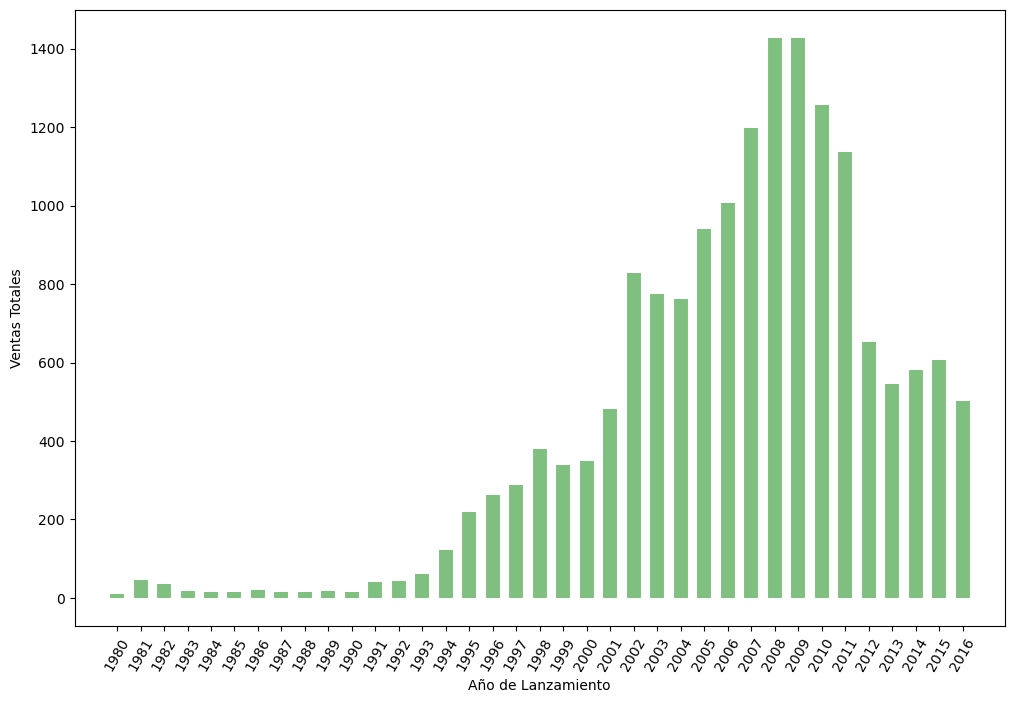

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar las líneas verticales
ax.vlines(x=games_per_year.year_of_release, ymin=0, ymax=games_per_year.ventas_totales, alpha=0.5, linewidth=10, color='green')

# Etiquetas de los ejes
ax.set_xlabel('Año de Lanzamiento')  # Etiqueta del eje X
ax.set_ylabel('Ventas Totales')      # Etiqueta del eje Y

# Personalización del eje X
ax.set_xticks(games_per_year.year_of_release)
ax.set_xticklabels(games_per_year.year_of_release, rotation=60)

# Mostrar el gráfico
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica, esta gráfica nos ayuda a entender también sobre el comportamiento del mercado de videojuegos en el tiempo
</div>

AL HACER ESTE ANALISIS VEMOS COMO VARIAN LAS VENTAS SEGUN PASAN LOS AÑOS LLEGANDO AL MAXIMO EN EL 2008 Y 2009 Y POSTERIORMENTE TENIENDO SUS BAJAS DE VENTAS HAY QUE RECORDAR Y TENER EN CUENTA QUE NO SE TOMARON EN CUENTA LOS DATOS AUSENTES DE LOS AÑOS QUE SE COLOCO EN [0]

### 1.5.2 Plataformas con mayores ventas

In [25]:
# Plataforma con mayores ventas
ventas_plataforma = datos_crudos.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index()
ventas_plataforma


,platform,ventas_totales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


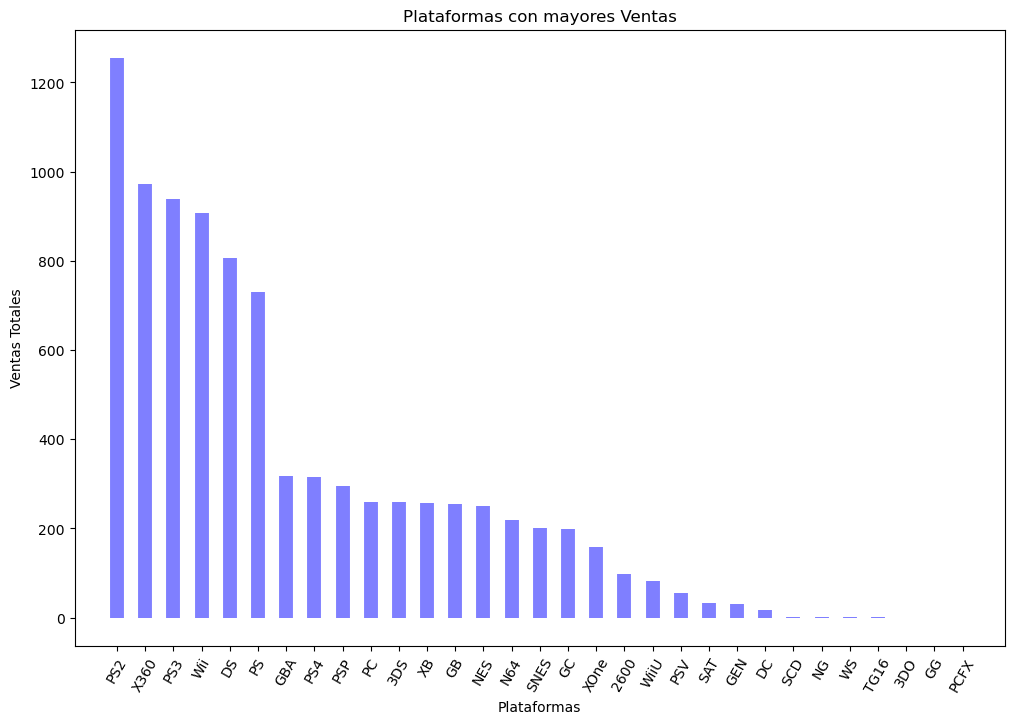

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar las líneas verticales
ax.vlines(x=ventas_plataforma.platform, ymin=0, ymax=ventas_plataforma.ventas_totales, alpha=0.5, linewidth=10, color='blue')

# Etiquetas de los ejes
ax.set_xlabel('Plataformas')         # Etiqueta del eje X
ax.set_ylabel('Ventas Totales')      # Etiqueta del eje Y

# Personalización del eje X
ax.set_xticks(ventas_plataforma.platform)
ax.set_xticklabels(ventas_plataforma.platform, rotation=60)
plt.title('Plataformas con mayores Ventas')

# Mostrar el gráfico
plt.show()

EN ESTE PUNTO DEL ANALISIS VEMOS TODAS LAS PLATAFORMAS CUALES SON DE MAYOR VENTAS QUE EN EL #1 FUE PS2 Y POSTERIORMENTE LE SIGUEN X360, PS3, WII, DS,PS  SIENTO TAMBIEN PARTE DE BUENAS VENTAS.

### 1.5.3 Êxito de las plataformas

In [27]:
ventas_plataforma['z_score']=(ventas_plataforma['ventas_totales']-ventas_plataforma['ventas_totales'].mean())/ventas_plataforma['ventas_totales'].std()

In [28]:
ventas_plataforma['color']=['red' if puntaje < 0 else 'green' for puntaje in ventas_plataforma ['z_score']]

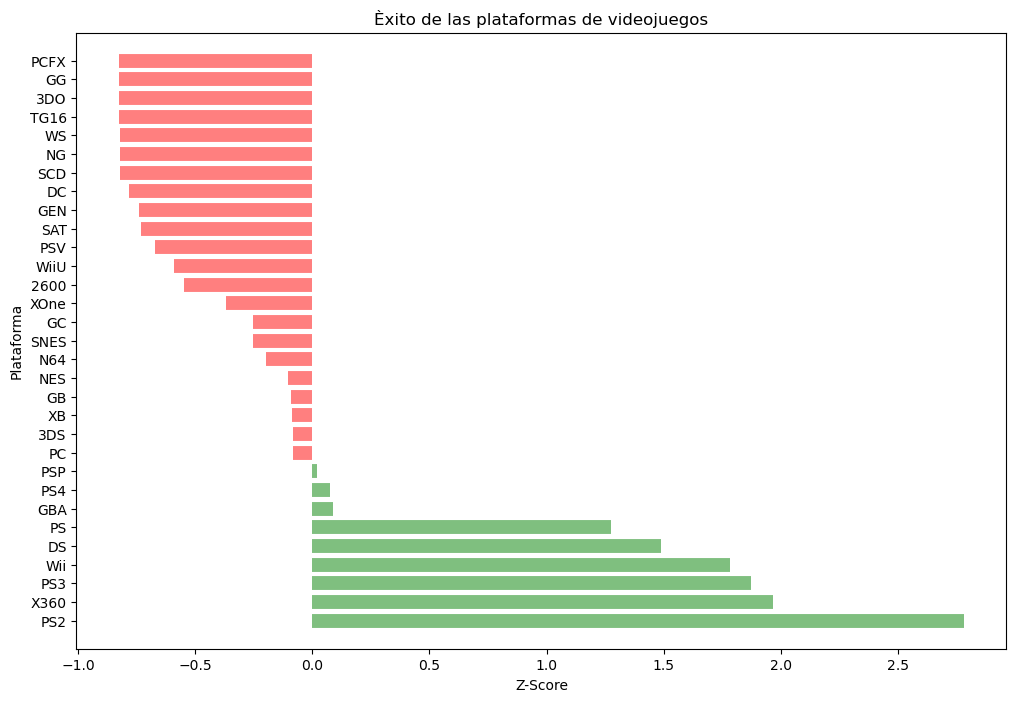

In [29]:
plt.figure(figsize = (12, 8))
plt.hlines(y=ventas_plataforma.platform, xmax=ventas_plataforma.z_score, xmin=0, linewidth =10, alpha=0.5, color=ventas_plataforma.color)
# Agrega etiquetas a los ejes
plt.xlabel('Z-Score')   # Etiqueta para el eje X
plt.ylabel('Plataforma')  # Etiqueta para el eje Y
plt.title('Èxito de las plataformas de videojuegos')

plt.show()

ESTE GRÁFICO NOS PERMITE OBSERVAR CÓMO HAN VARIADO LA POPULARIDAD Y EL ÉXITO DE LAS PLATAFORMAS DE VIDEOJUEGOS A LO LARGO DEL TIEMPO. MUESTRA CLARAMENTE CUÁLES PLATAFORMAS DOMINARON EN CIERTOS PERÍODOS Y CUÁLES NO LOGRARON UN IMPACTO SIGNIFICATIVO. ES UNA VISUALIZACIÓN ÚTIL PARA COMPRENDER LA EVOLUCIÓN DE LA INDUSTRIA Y EL CICLO DE VIDA DE LAS PLATAFORMAS DE VIDEOJUEGOS.

### 1.5.4 Los juegos que fueron lanzados en diferentes años.

 #### 1.5.4.1 Tiempo de vida de las plataformas desde 1980

In [30]:

df_tiempo_de_vida = datos_crudos.pivot_table(
    index= 'year_of_release', columns = 'platform', values = 'ventas_totales', aggfunc = 'sum'
).fillna(0)

In [31]:
df_tiempo_de_vida = df_tiempo_de_vida.iloc[1: , : ]

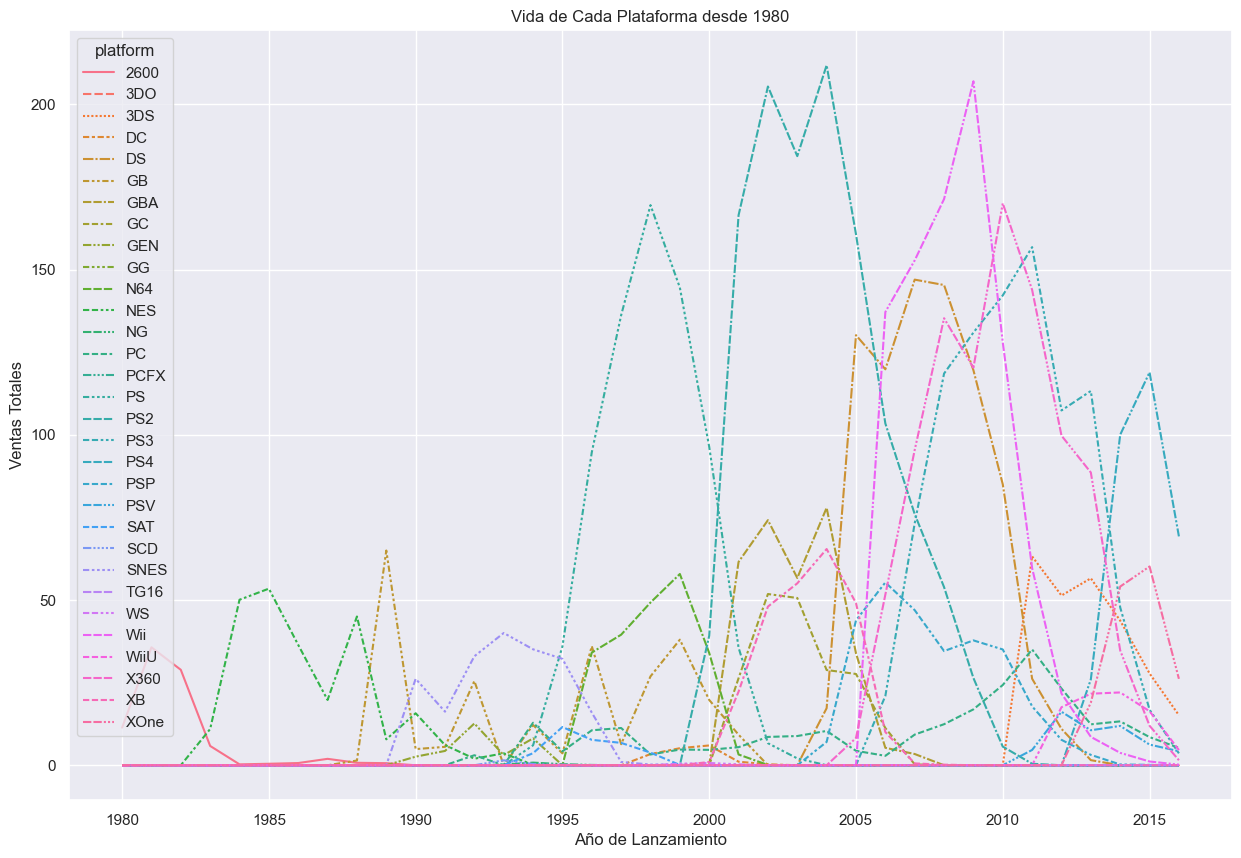

In [32]:
sns.set(rc={'figure.figsize': (15,10)})
sns.lineplot(data=df_tiempo_de_vida)
plt.xlabel('Año de Lanzamiento')   # Etiqueta para el eje X
plt.ylabel('Ventas Totales')  # Etiqueta para el eje Y
plt.title('Vida de Cada Plataforma desde 1980')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
Ya se corrigio lo hacia echo con una escala mas grande pero ya lo corregi a como se me indica para visualizar 5 años si embargo segui dejando la grafica con todos los años porque siento que es importante ver el contexto mas atras tambien 

</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo, como comentas esta gráfica puede complementar a las que habías realizado anteriormente. Esto ayuda en gran medida a contrastar resultados en el tiempo    

AQUI OBSERVAMOS LA VIDA DE CADA PLATAFORMA Y COMO SE VAN MANTENIENDO NOS MUESTRA DESDE 1980 QUE ESAS PLATAFORMA QUE INICIARON APROXIMANDAMENTE DESAPARECIERON EN 10 AÑOS Y CADA 10 AÑOS APARECE UNA PLATAFORMA DE JUEGO Y VEMOS CUALES SON LAS QUE SE HAN MANTENIDO EN EL MERCADO CON MAYORES VENTAS 

 #### 1.5.4.1 Tiempo de vida de las plataformas desde 2005

In [33]:
clean_data = datos_crudos[datos_crudos.year_of_release >= 2012]

In [34]:
df_tiempo_de_vida = clean_data.pivot_table(
    index= 'year_of_release', columns = 'platform', values = 'ventas_totales', aggfunc = 'sum'
).fillna(0)

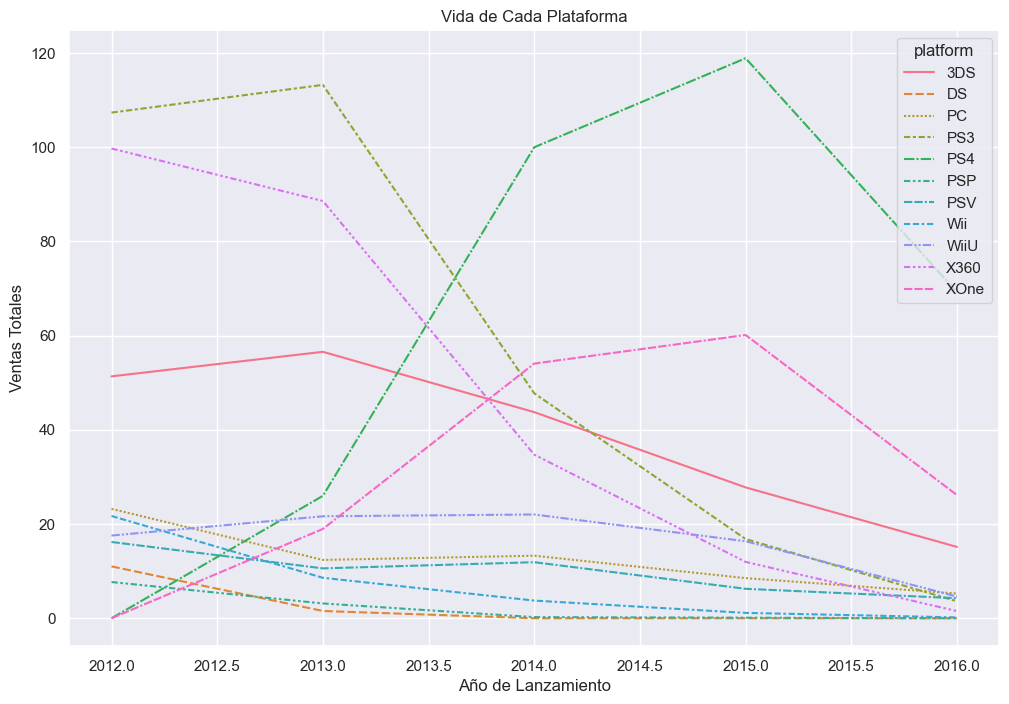

In [35]:
sns.set(rc={'figure.figsize': (12,8)})
sns.lineplot(data=df_tiempo_de_vida)
plt.xlabel('Año de Lanzamiento')   # Etiqueta para el eje X
plt.ylabel('Ventas Totales')  # Etiqueta para el eje Y
plt.title('Vida de Cada Plataforma')
plt.show()

ESTA IMAGEN ES PARTE DE LA ANTERIOR PERO EN ESTA VEMOS EL ANALISIS DEDE 2005 YA QUE EN ESAS FECHAS MAS O MENOS HAY MAS PLATAFORMAS EN EL MERCADO Y VEMOS DETENIDAMENTE CUALES SE HAN MANTENIDO EN LOS ULTIMOS 11 AÑOS 

## 1.6 prueba de hipotesis 

### 1.6.1 HIPOTESISI #1 Calificacion promedio de los usuarios para la plataforma PC y XOne son las mismas 

In [36]:
comparacion =clean_data.query('user_score > 0 & (platform == "XOne" or platform == "PC" )')

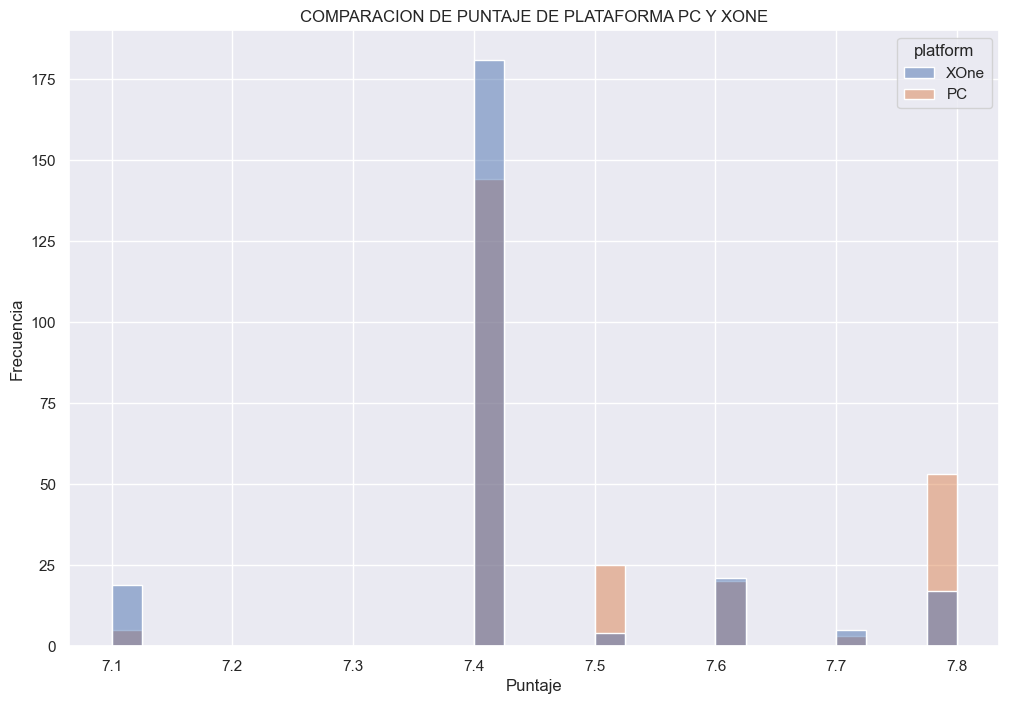

In [37]:
sns.histplot(comparacion, x='user_score', hue = 'platform')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('COMPARACION DE PUNTAJE DE PLATAFORMA PC Y XONE')
plt.show()

EN ESTA GRAFICA VEMOS QUE PC TIENE MAS CANTIDAD DE PERSONAS QUE HAY VOTADO POR LOS PUNTAJES DE 8.3 APROXIMADAMENTE Y LOS DE XONE SU PUNTAJE MAYOR ES 7 

[RESPUESTA A LA NUEVA GRAFICA ES QUE PC Y XONE AMBAS TIENE MAS VOTACIONES EN 7.4 Y PC GANANDO SEGUNDO LUGAR DE VOTACIONES CON 7.8]

In [38]:
comparacion.groupby('platform')['user_score'].mean()

platform
PC      7.50840
XOne    7.42915
Name: user_score, dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo! Solamente para complementar el análisis puedes desarrollar una gráfica de cajas que nos ayude a identificar valores atípicos y un par de gráficos que muestren la relación entre las score de los usuarios y críticos con las ventas. En complemento a esto recuerda desarrollar un análisis por región

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
YA SE HIZO LAS GRAFICAS DE BOXPLOT DE CRITIAL_SCORE Y USER_SCORE ASI COMO UNA TABLA DE DISPERSION 
    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con las gráficas complementarias 

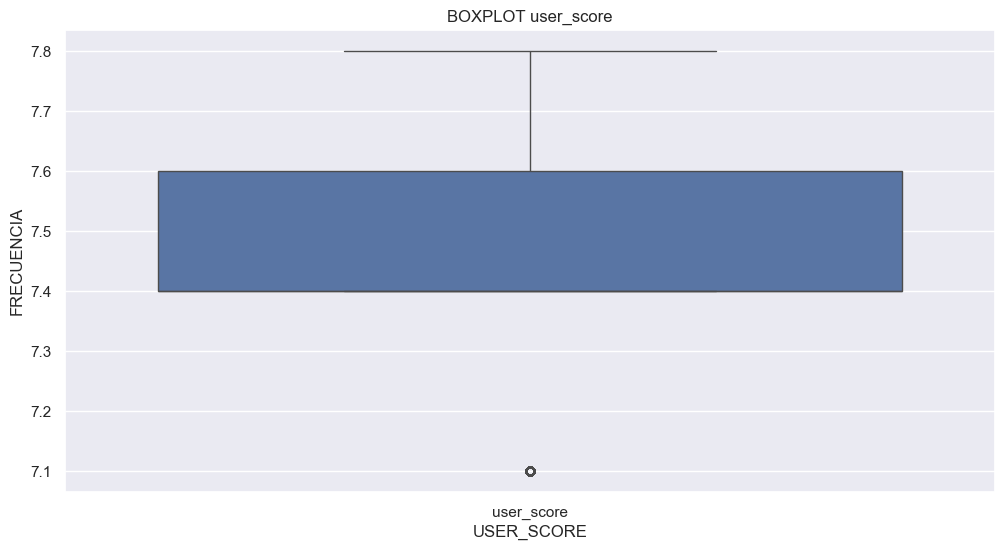

In [39]:
# Gráfico de cajas para 'user_score'
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_crudos[['user_score']])
plt.title('BOXPLOT user_score')
plt.xlabel('USER_SCORE')
plt.ylabel('FRECUENCIA')
plt.show()

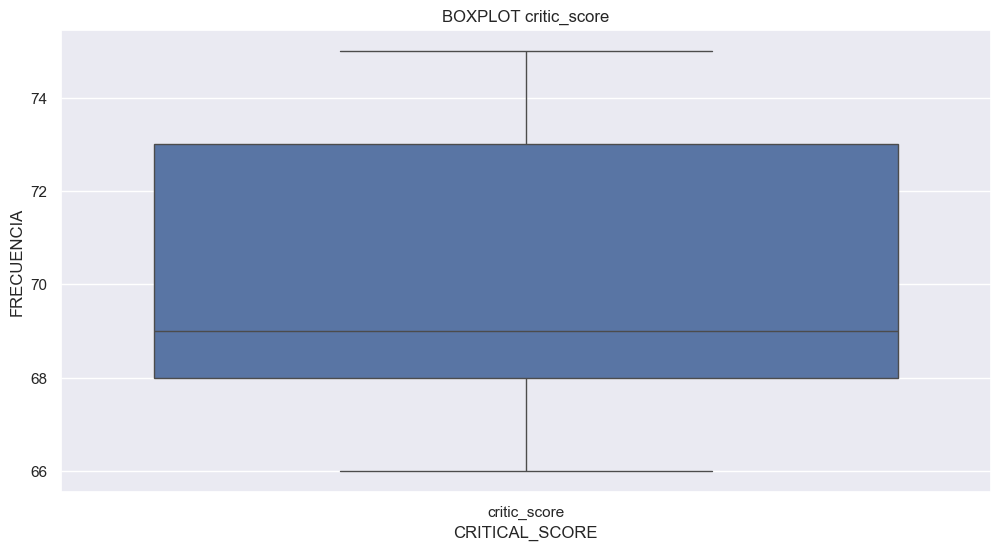

In [40]:
# Gráfico de cajas para 'critic_score'

plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_crudos[['critic_score']])
plt.title('BOXPLOT critic_score')
plt.xlabel('CRITICAL_SCORE')
plt.ylabel('FRECUENCIA')
plt.show()


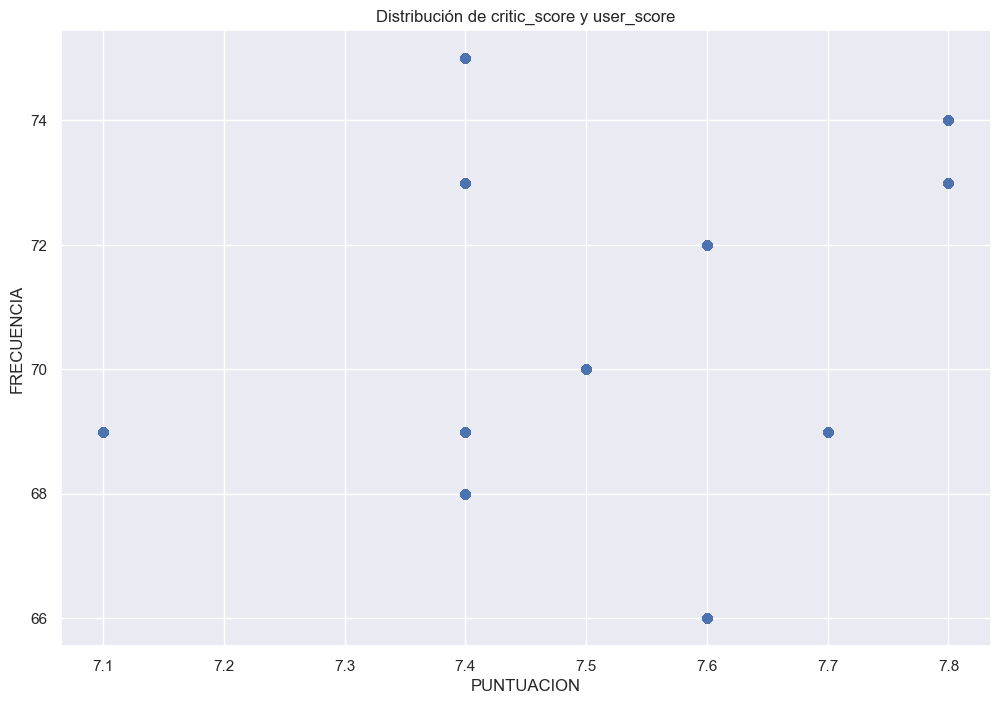

In [41]:
plt.scatter(datos_crudos['user_score'],datos_crudos['critic_score'])
plt.title('Distribución de critic_score y user_score')
plt.xlabel('PUNTUACION')
plt.ylabel('FRECUENCIA')
plt.show()

H0: la diferencia entre el promedio de score de usuarios al XOne y la PC NO son estadisticamente efectivas, es decir son iguales

H1: la diferencia entre el promedio de score de usuarios al XOne y la PC son estadisticamente efectivas, es decir son diferentes

In [42]:
xone=comparacion.query('platform == "XOne"')
pc = comparacion.query('platform == "PC"')

In [43]:
nivel_de_confianza = 0.95
alpha = 1-nivel_de_confianza

In [44]:
p_value_levene = stats.levene(xone['user_score'], pc['user_score']).pvalue

if p_value_levene < alpha:
    print('Podemos rechazar la hipotesis H0: la varianza de X1 no es igual a la varianza de PC')
else:
    print('No se puede rechazar H0: no hay evidencia suficiente para decir que las varianzas de XOne y PC son iguales ')
    

Podemos rechazar la hipotesis H0: la varianza de X1 no es igual a la varianza de PC


In [45]:
p_value = stats.ttest_ind(
   xone['user_score'], pc['user_score'], nan_policy='omit', equal_var=False).pvalue
if p_value < alpha:
    print("Rechazar H0: existen diferencias estadísticamente significativas entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC")
else:
    print("No se puede rechazar H0: No tenemos evidencia suficiente para decir que la diferencia entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC sea estadísticamente insignificante..")

Rechazar H0: existen diferencias estadísticamente significativas entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC


AQUI HICIMOS UNA PRUENA DE HIPOTESIS CUAL ES EL PROMEDIO DE USUARIOS QUE USAN XONE Y PC Y SI SON IGUALES Y NOS SALIO QUE HIPOTESIS H0 SE RECHAZA LO CUAL SUGIERE QUE LOS PUNTAJES PROMEDIOS DE LOS USUARIOS XONE Y PC SON EFECTIVAS, DIFERENTES DE UNA MANERA ESTADISTICA SIGNFIFICATIVA. 

### 1.6.2 HIPOTESIS 2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes 

In [46]:
comparacion_genero =clean_data.query('user_score > 0 & (genre == "Action" or genre == "Sports" )')

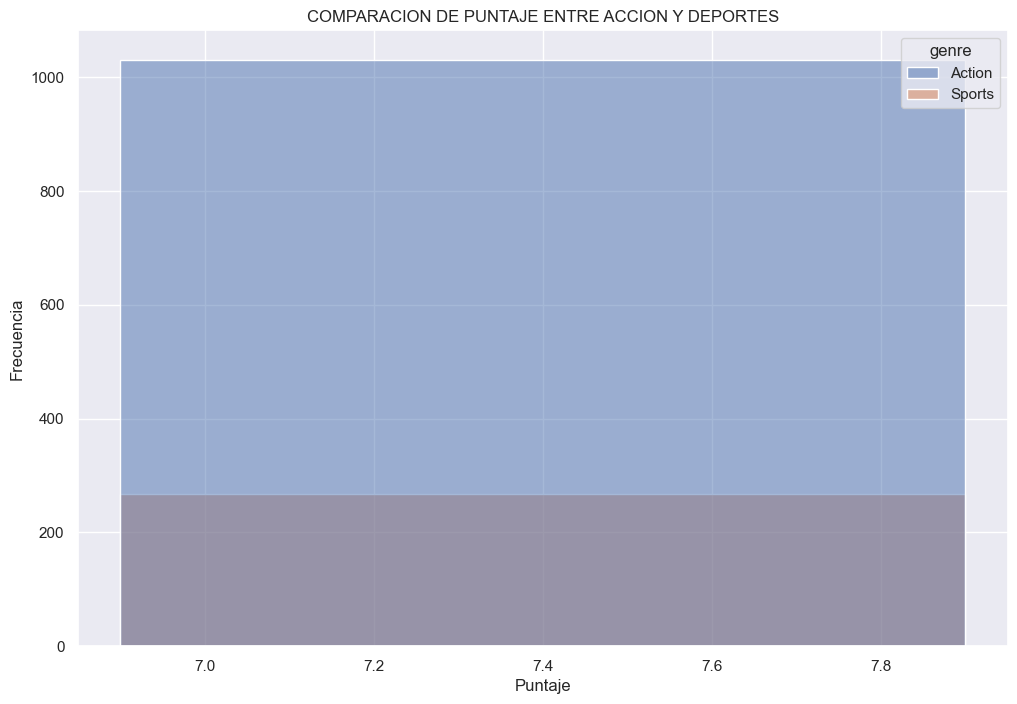

In [47]:
sns.histplot(comparacion_genero, x='user_score', hue = 'genre')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('COMPARACION DE PUNTAJE ENTRE ACCION Y DEPORTES')
plt.show()

[NO SE QUE DECIR CON ESTA GRAFICA YA QUE DESDE QUE SE RELLENO LOS DATOS AUSENTES CON LA MEDIANA EMPEZO A APARECER ASI LO UNICO QUE PUEDO VER ES QUE LA PUNTUACION ES DIJA DE  7 A 8 Y EL QUE SUPERA LAS PUNTUACIONES O VOTACIONES ES EL GENERO ACCCION]

In [48]:
comparacion_genero.groupby('genre')['user_score'].mean()

genre
Action    7.4
Sports    7.4
Name: user_score, dtype: float64

In [49]:
accion = comparacion.query('genre == "Action"')
deportes = comparacion.query('genre == "Sports"')

In [50]:
nivel_de_confianza_2 = 0.95
alpha_2 = 1-nivel_de_confianza_2

In [51]:
p_value_levene = stats.levene(accion['user_score'], deportes['user_score']).pvalue

if p_value_levene < alpha:
    print('Podemos rechazar la hipotesis H0: la varianza de X1 no es igual a la varianza de genero Accion y Deportes')
else:
    print('No se puede rechazar H0: no hay evidencia suficiente para decir que las varianzas de genero Accion y Deportes son iguales ')
    

No se puede rechazar H0: no hay evidencia suficiente para decir que las varianzas de genero Accion y Deportes son iguales 


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:3345: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom


In [52]:
p_value = stats.ttest_ind(
   accion['user_score'], deportes['user_score'], nan_policy='omit', equal_var=False).pvalue
if p_value < alpha:
    print("Rechazar H0: existen diferencias estadísticamente significativas entre las calificaciones promedio de los usuarios de los genero Accion y Deportes")
else:
    print("No se puede rechazar H0: No tenemos evidencia suficiente para decir que la diferencia entre las calificaciones promedio de los usuarios de los genero Accion y Deportes sea estadísticamente insignificante..")

No se puede rechazar H0: No tenemos evidencia suficiente para decir que la diferencia entre las calificaciones promedio de los usuarios de los genero Accion y Deportes sea estadísticamente insignificante..


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Y NUESTRA HIPOTESIS AQUI ES QUE EL PROMEDIO DE ACCION Y DEPORTE ESTADISTICAMENTE SON IGUALES Y SE RECHAZA LA HIPOTESIS NULA 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con las pruebas de hipótesis, además lo complementaste con la prueba de levene para mostrar el supuesto de varianzas iguales

## 1.7 Conclusion General

EN CONCLUCION A PESAR DE QUE HAY MUCHOS DATOS AUSENTES DETERMINAMOS QUE 

1.- QUE LAS VENTAS MAS ALTAS SON DEL 2007 AL 2011 SIENDO LOS AÑOS CON MAS VENTAS DESPUES DEL 2011 BAJARON MUCHO LAS VENTAS
2.- LAS PLATAFORMAS MAS VENDIDAS SON #1 PS2 Y POSTERIORMENTE LE SIGUEN X360, PS3, WII, DS,PS
3.- LAS PALTAFORMAS CON MAYOR PUPULARIDAD SIGUEN SIENDO PS2 Y X360
4.- NOS DIMOS CUENTA QUE LA VIDA DE UNA PLATAFORMA ES MAS O MENOS 10 AÑOS Y DESPUES DE ESO UNA DE CAEN Y OTRAS DESAPARECEN Y UNAS SE SIGUEN MANTENIENDO DE PIE Y CON BUENAS GANANCIAS
5.- SE HIZO UNA COMPARACION DE PROMEDIO DE 2 PLATAFORMAS QUE ES PC Y XONE LA CUAL SALIO EXISTEN DIFERENCIAS DE CALIFICACIONES ESTADISTICAMENTE ENTRE XONE Y PC 
6.- SE HIZO UNA COMPARACION DE PROMEDIO DE 2 GENEROS QUE FUE ACCION Y DEPORTES Y SALIO SON DIFERENTES DE CALIFICACIONES ESTADISTICAS ENTRE ACCION Y DEPORTES 



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Complementar el análisis gráfico con un gráfico de cajas y unos gráficos que muestren la relación de ventas con scores
</div>

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
*CLARO QUE LOS ANALISIS APARENTEMENTE NO LOS CAMBIA CONFORME A LOS DATOS QUE SE NECESITA AL MODIFICARLO NUESTRA HIPOTESIS SIGUE SIENDO LA MISMA PERO EL ANALISIS SI YA QUE AL RELLENAR LOS DATOS CON LA MEDIANA ENTRAN MAS VALORES DE UN LADO QUE DE OTRO LOS CUALES VIENEN ESTANDO EN LA MEDIANA, ES CUESTIOS DE PERSEPTIVA CLARO, Y CLARO ESTA QUE HAGO LO QUE SE ME INDICA SI ASI LO DECEAN ADELANTE PERO NO ESTOY DE ACUERDO.
    
*COMO COMENTARIO TAMBIEN EN LA PLATAFORMA DE TRIPLETEN NO ESTA INSTALADA LA LIBRERIA sidetable LO CUAL POR ESE MOTIVO COMENTE UNAS LINEAS PARA QUE ME DEJARA CORRER EL KERNEL YA LO REPORTE A SISTEMAS DE LA PLATAFORMA Y ME COMUNIQUE CON MI MANAGER VIRIDIANA SOBRE EL TEMA SIN MAS QUE DECIR MUCHAS GRACIAS POR LA REVISION Y ESTAMOS AL PENDIENTE SALUDOS ELPIDIO LOZANO
    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Elpidio Lozano. Realizaste un excelente trabajo con los ajustes. Te deje un comentario en el apartado de completar los valores nulos. Si bien tu proyecto ya esta completo, aún no lo voy a aprobar para asegurarme que es claro lo que te comento y puedas utilzarlo para futuros proyectos. De igual manera voy a darle seguimiento a lo que comentas sobre la libreria sidetable

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
*OK si me quedo claro dado esto y seguire dejando la linea de codigo para el -1 con fines de resiclar el codigo a futuros proyectos que necesite. y sobre la libreria sidetable ya lo comente en la paguina de tripleten en soporte, con viridiana y con ustes ya solo queda esperar a que este habilitada para ocuparla sin embargo ya le quite 
    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Muy bien, sigue con el excelente trabajo!